In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [10]:
dataset=pd.read_csv("Housing.csv")
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

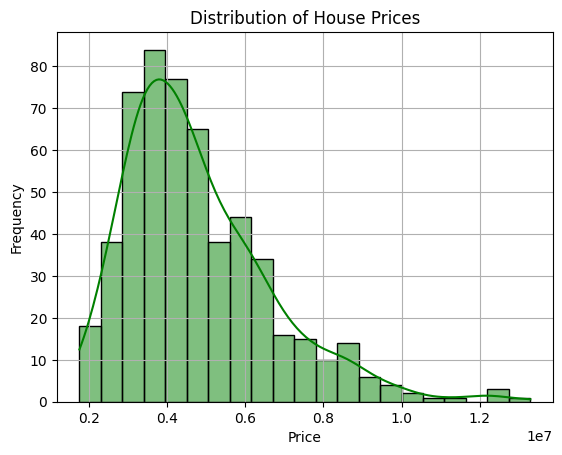

In [63]:
sns.histplot(dataset["price"], kde=True, color="green")
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


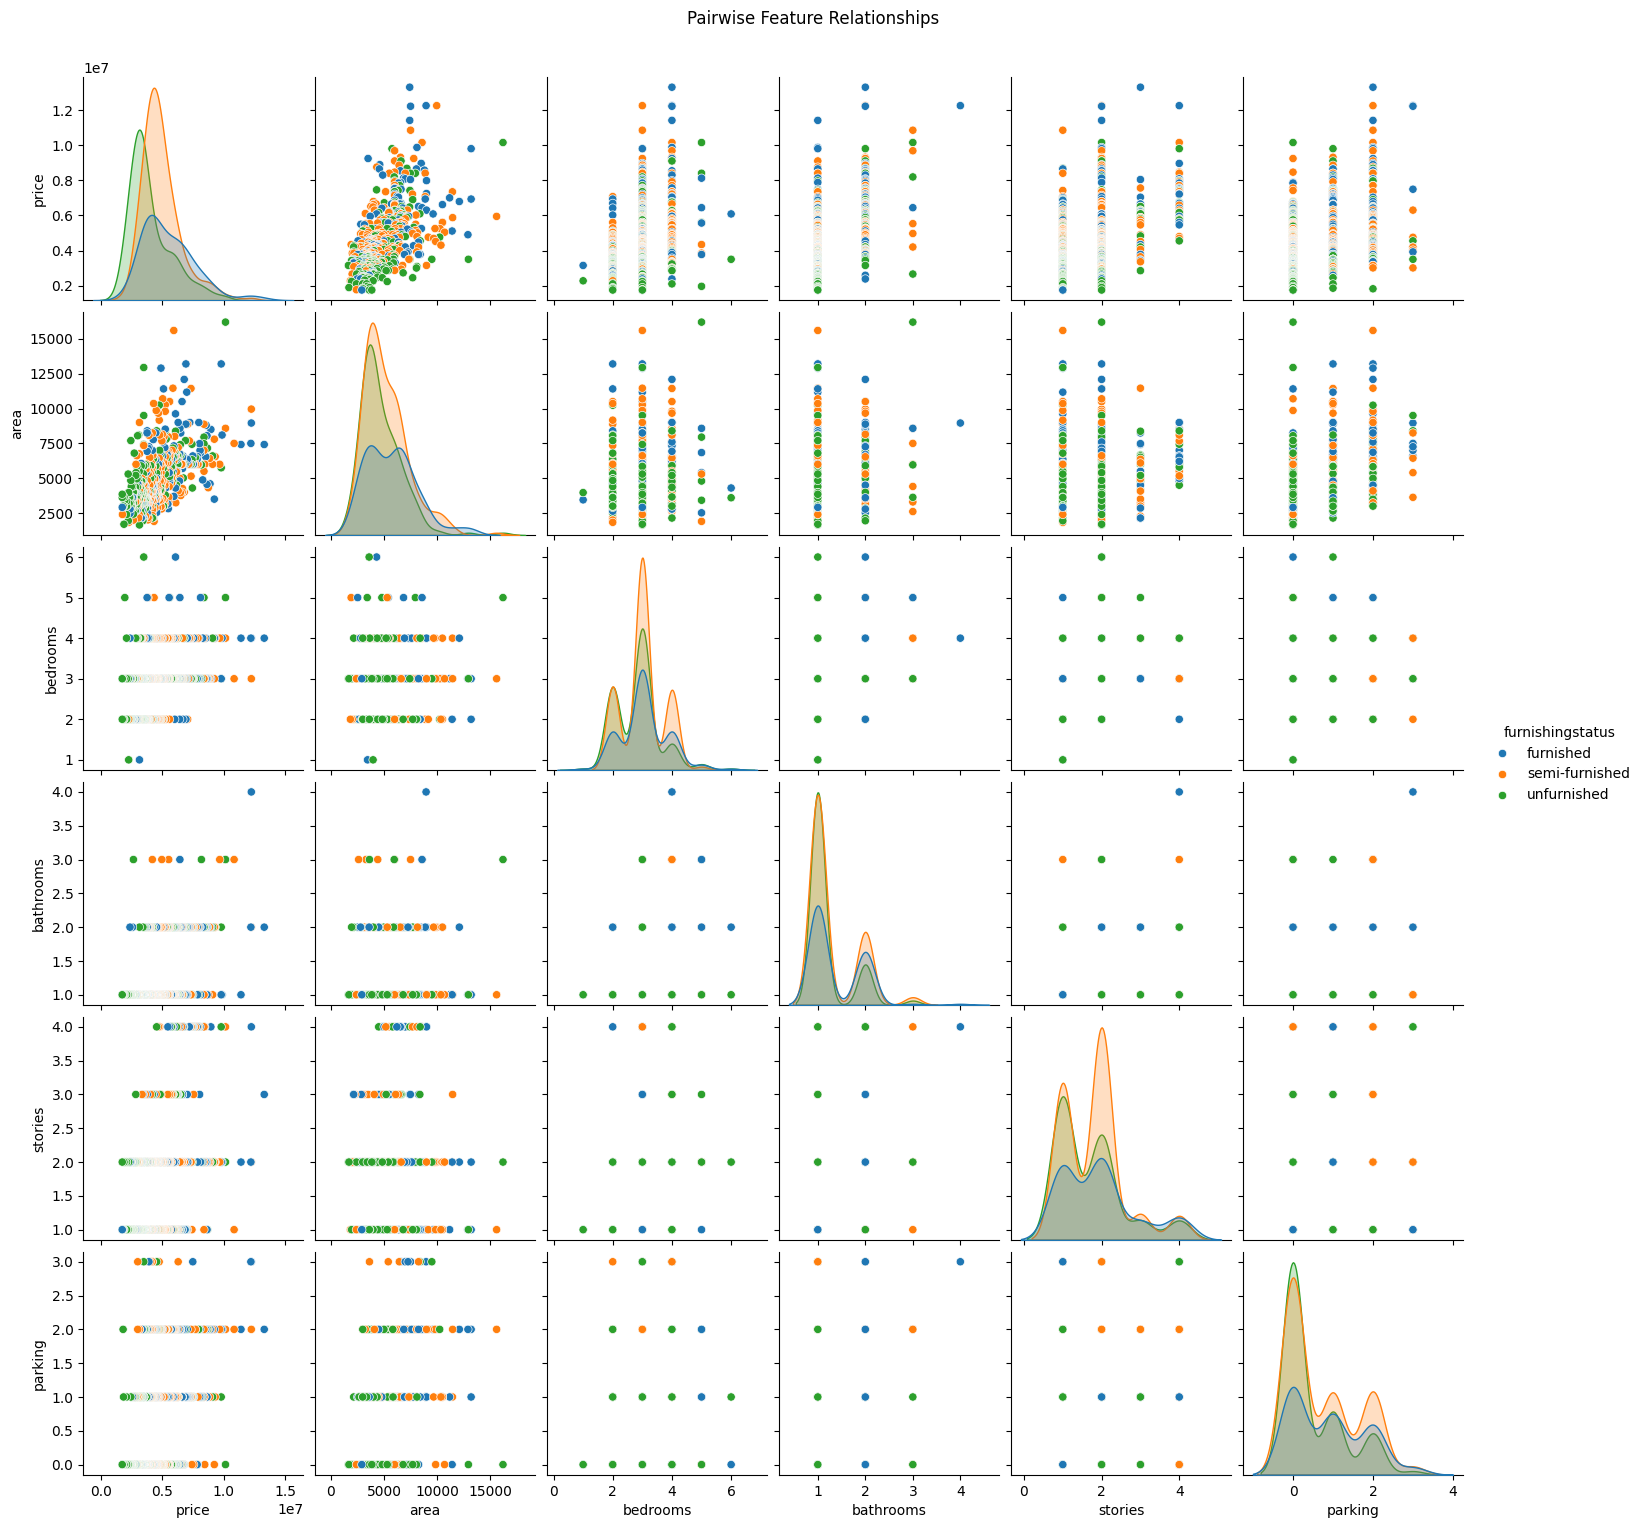

In [64]:
sns.pairplot(dataset, hue="furnishingstatus", diag_kind="kde")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


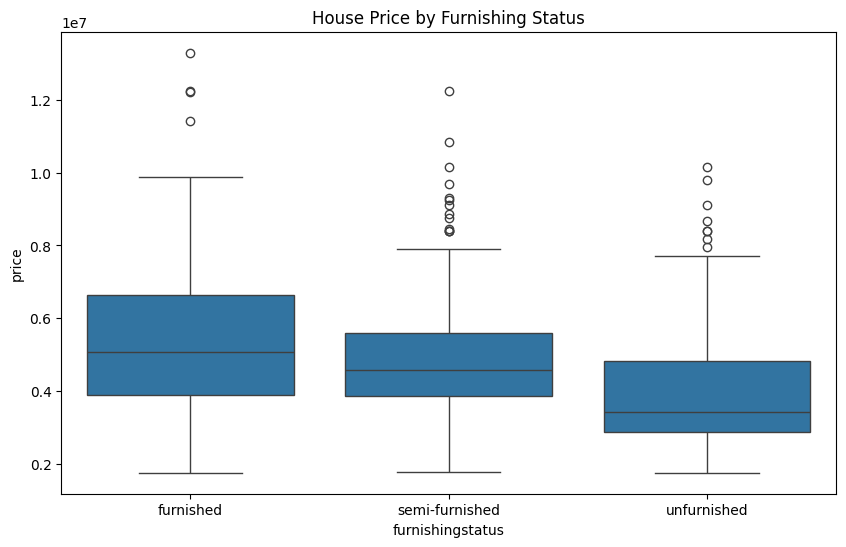

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x="furnishingstatus", y="price", data=dataset)
plt.title("House Price by Furnishing Status")
plt.show()


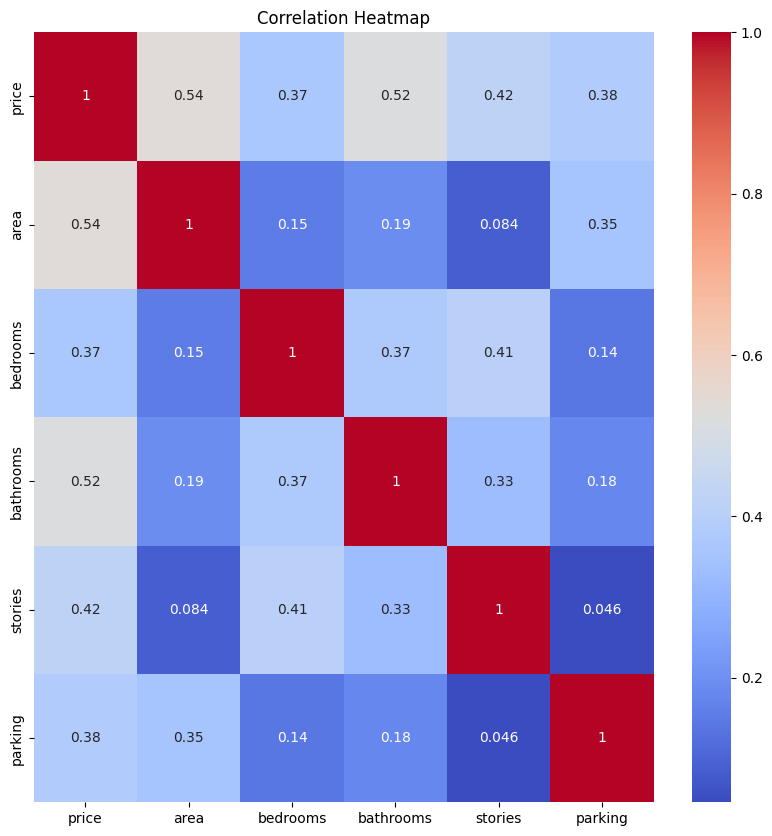

In [14]:
plt.figure(figsize=(10,10))
numeric_data=dataset.select_dtypes(include='int64')
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [42]:
cat_data=x.select_dtypes(include="object")
num_data=x.select_dtypes(exclude="object")

In [31]:
#one hot encoding
en_data=dataset.select_dtypes(include="object")
pd.get_dummies(en_data)
pd.get_dummies(en_data).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   mainroad_no                      545 non-null    bool 
 1   mainroad_yes                     545 non-null    bool 
 2   guestroom_no                     545 non-null    bool 
 3   guestroom_yes                    545 non-null    bool 
 4   basement_no                      545 non-null    bool 
 5   basement_yes                     545 non-null    bool 
 6   hotwaterheating_no               545 non-null    bool 
 7   hotwaterheating_yes              545 non-null    bool 
 8   airconditioning_no               545 non-null    bool 
 9   airconditioning_yes              545 non-null    bool 
 10  prefarea_no                      545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_furnished       545 non-null    b

In [38]:
ohe=OneHotEncoder(drop='first')
arr=ohe.fit_transform(en_data).toarray()
arr

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(545, 8))

In [43]:
#encoded data
en_cols=ohe.get_feature_names_out(en_data.columns)
en_df=pd.DataFrame(arr, columns=en_cols)
en_df

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
x_final=pd.concat([num_data.reset_index(drop=True), en_df], axis=1)
x_final.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [54]:
#scalling
sc=StandardScaler()
sc.fit(x_final)
x_scaled=pd.DataFrame(sc.transform(x_final), columns=x_final.columns)

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [56]:
lr=LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

100.0

In [57]:
lr.coef_

array([ 1.86872283e+06,  8.17921204e-10, -2.77988961e-10,  7.67695291e-10,
        8.78458121e-10,  3.60127646e-10,  9.77779573e-11, -4.16785261e-10,
       -6.66954812e-10,  1.56787785e-10,  5.83259264e-10,  2.79885113e-10,
       -1.17568460e-10, -2.26385454e-10, -5.78861158e-10,  1.12507603e-10,
        6.63192338e-10, -2.25132042e-11, -1.35962770e-10, -5.63764215e-10])

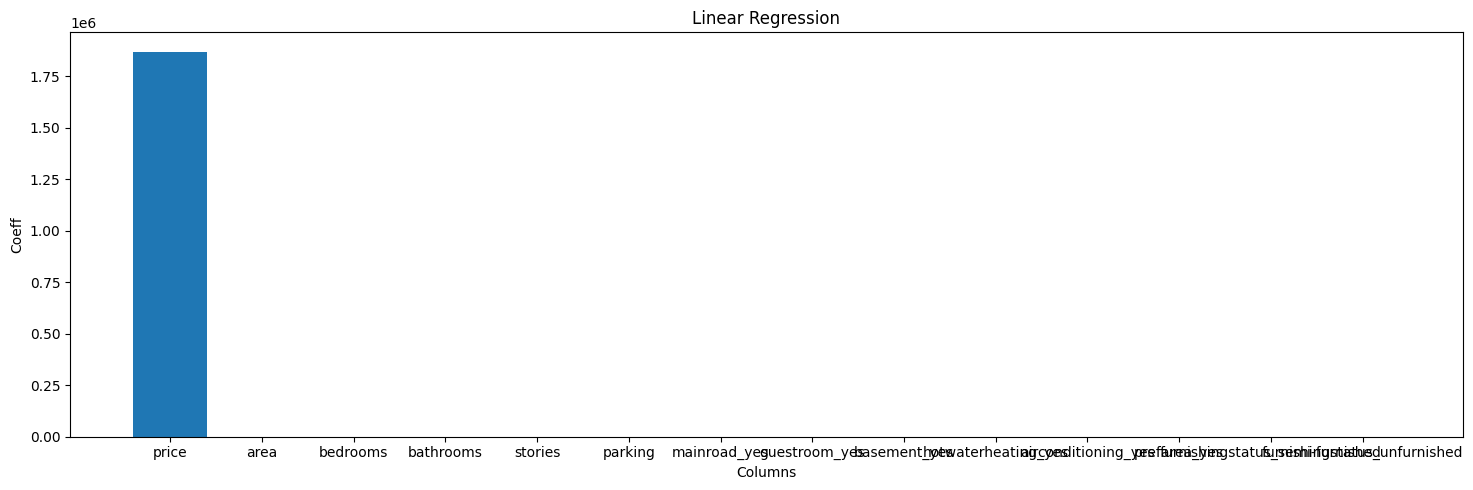

In [60]:
plt.figure(figsize=(15,5))
plt.bar(x_final.columns, lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.tight_layout()
plt.show()

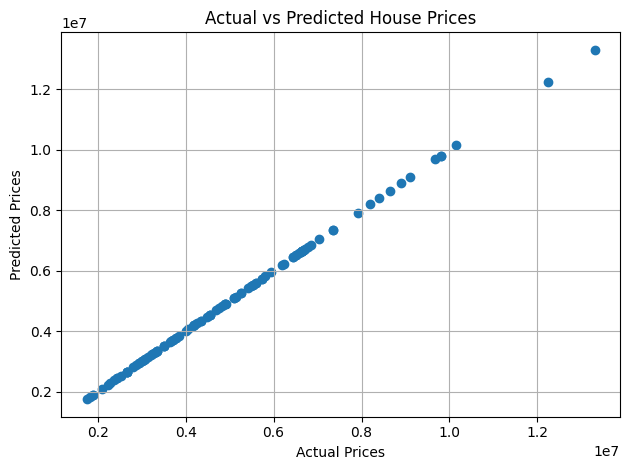

In [62]:
y_pred=lr.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

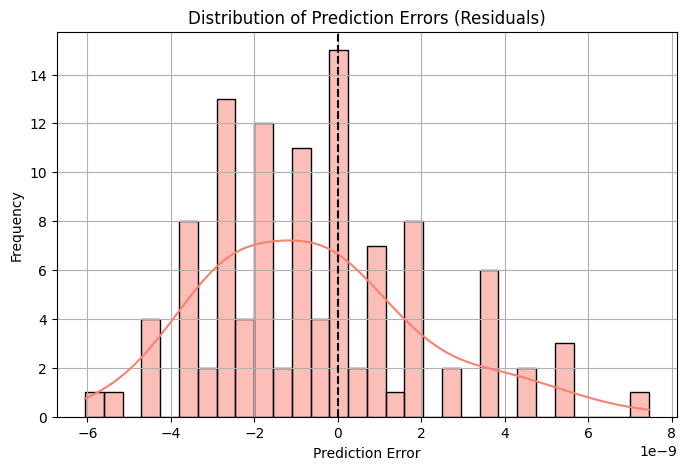

In [69]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="salmon")
plt.axvline(0, color='black', linestyle='--')
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
